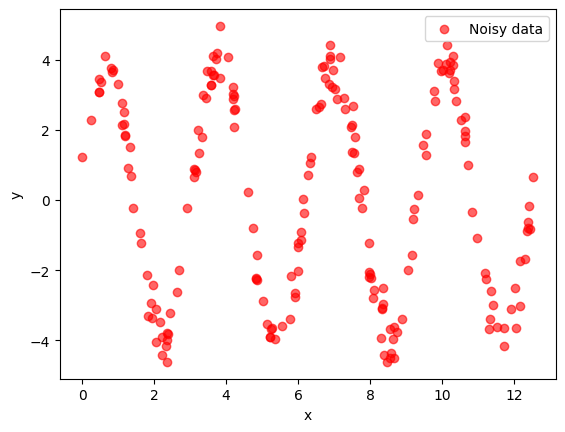

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points
n = 200
NPM = 90

# Generate random x values between 0 and 4π
np.random.seed(NPM)
x = np.random.uniform(0, 4*np.pi, n)

# Original function
y_true = 4 * np.sin(2*x + 0.2)

# Add Gaussian noise
noise = np.random.normal(0, 0.4, n)  # mean=0, std=0.5
y_noisy = y_true + noise

# Plot
plt.scatter(x, y_noisy, label="Noisy data", color="red", alpha=0.6)
# plt.plot(np.sort(x), 4*np.sin(4*np.sort(x) + 0.2), label="True function", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# TUGAS: temukan kembali fungsi asli dengan interpolasi dari titik-titik data acak (y_noisy)

/tmp/ipython-input-2344801211.py:12: OptimizeWarning: Covariance of the parameters could not be estimated
  sine_params, covariance_sine = curve_fit(fit_sine_function, x, y_noisy, p0=tebakan_sinus_awal)


Koefisien parameter fungsi interpolasi sinus:
A1: 3.939, B1: 1.997, C1: 0.228
A2: 0.000, B2: 0.000, C2: 0.000
D: -0.028

Koefisien parameter fungsi interpolasi polinomial:
a: 0.000, b: -0.011, c: 0.189,
d: -1.590, e: 6.589, f: -12.128,
g: 7.343


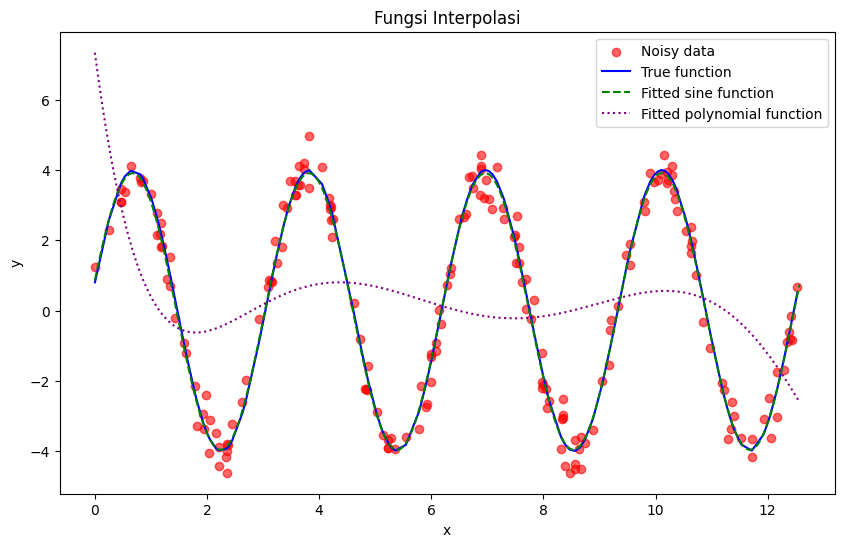

In [23]:
from scipy.optimize import curve_fit

# Model fungsi yang diambil:
def fit_sine_function(x, A1, B1, C1, A2, B2, C2, D):
    return A1 * np.sin(B1 * x + C1) + A2 * np.sin(B2 * x + C2) + D
def fit_polynomial_function(x, a, b, c, d, e, f, g):
    return a * x**6 + b * x**5 + c * x**4 + d * x**3 + e * x**2 + f * x + g

tebakan_sinus_awal = [4, 2, 0.2, 0, 0, 0, 0]
tebakan_polinomial_awal = [0, 10, 1, -50, -2, 8, 1]

sine_params, covariance_sine = curve_fit(fit_sine_function, x, y_noisy, p0=tebakan_sinus_awal)
poly_params, covariance_poly = curve_fit(fit_polynomial_function, x, y_noisy, p0=tebakan_polinomial_awal)

A1_fit, B1_fit, C1_fit, A2_fit, B2_fit, C2_fit, D_fit = sine_params
a_fit, b_fit, c_fit, d_fit, e_fit, f_fit, g_fit = poly_params


print(f"Koefisien parameter fungsi interpolasi sinus:")
print(f"A1: {A1_fit:.3f}, B1: {B1_fit:.3f}, C1: {C1_fit:.3f}")
print(f"A2: {A2_fit:.3f}, B2: {B2_fit:.3f}, C2: {C2_fit:.3f}")
print(f"D: {D_fit:.3f}")

print(f"\nKoefisien parameter fungsi interpolasi polinomial:")
print(f"a: {a_fit:.3f}, b: {b_fit:.3f}, c: {c_fit:.3f},\nd: {d_fit:.3f}, e: {e_fit:.3f}, f: {f_fit:.3f},\ng: {g_fit:.3f}")


x_fit = np.linspace(0, 4*np.pi, 500)
y_fit_sine = fit_sine_function(x_fit, *sine_params)
y_fit_poly = fit_polynomial_function(x_fit, *poly_params)

plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, label="Noisy data", color="red", alpha=0.6)
plt.plot(np.sort(x), 4*np.sin(2*np.sort(x) + 0.2), label="True function", color="blue")
plt.plot(x_fit, y_fit_sine, label="Fitted sine function", color="green", linestyle='--')
plt.plot(x_fit, y_fit_poly, label="Fitted polynomial function", color="purple", linestyle=':')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Fungsi Interpolasi")
plt.show()

Model fungsi sinus yang digunakan untuk interpolasi: $f_{sinus}(x) = A_1\sin(B_1x + C_1) + A_2\sin(B_2x + C_2) + D$

Model fungsi polinomial yang digunakan untuk interpolasi: $f_{polinomial}(x) = ax^6 + bx^5 + cx^4 + dx^3 + ex^2 + fx + g$

Ternyata fungsi polinomialnya tidak bisa digunakan untuk interpolasi, mendekati pun tidak.